In [1]:
import itertools
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import sklearn.decomposition
import sys

CURRENT_DIR = os.getcwd()
PARENT_DIR = os.path.dirname(CURRENT_DIR)
sys.path.append(PARENT_DIR)

from FDApy.univariate_functional import UnivariateFunctionalData
from FDApy.irregular_functional import IrregularFunctionalData
from FDApy.multivariate_functional import MultivariateFunctionalData
from FDApy.fpca import UFPCA, MFPCA
from FDApy.local_polynomial import LocalPolynomial
from FDApy.plot import *
from FDApy.utils import *

In [2]:
# Load the data into a Pandas Dataframes
precipitation = pd.read_csv(''.join([CURRENT_DIR, '/canadian_precipitation_monthly.csv']), index_col=0)
temperature = pd.read_csv(''.join([CURRENT_DIR, '/canadian_temperature_daily.csv']), index_col=0)

In [3]:
# Create univariate functional data for the precipitation data
argvals = tuple(pd.factorize(precipitation.columns)[0])
values = np.array(precipitation)
monthlyPrec = UnivariateFunctionalData(argvals, values)

In [4]:
# Create univariate functional data for the daily temperature data.
argvals = tuple(pd.factorize(temperature.columns)[0])
values = np.array(temperature) / 4
dailyTemp = UnivariateFunctionalData(argvals, values)

In [5]:
# Create multivariate functional data for the Canadian weather data.
canadWeather = MultivariateFunctionalData([dailyTemp, monthlyPrec])

In [6]:
# Print example of a UnivariateFunctionalData
dailyTemp

Univariate Functional data objects with 35 observations of 1-dimensional support
argvals:
	0, 1, ... , 364	(365 sampling points)
values:
	array of size (35, 365)

In [7]:
# Print example of a MultivariateFunctionalData
canadWeather

Multivariate Functional data objects with 2 funtions:
- Univariate Functional data objects with 35 observations of 1-dimensional support
argvals:
	0, 1, ... , 364	(365 sampling points)
values:
	array of size (35, 365)
- Univariate Functional data objects with 35 observations of 1-dimensional support
argvals:
	0, 1, ... , 11	(12 sampling points)
values:
	array of size (35, 12)

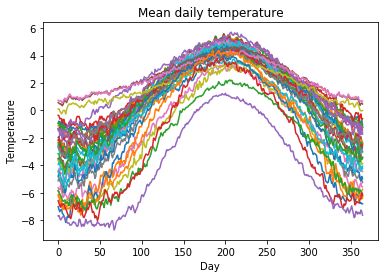

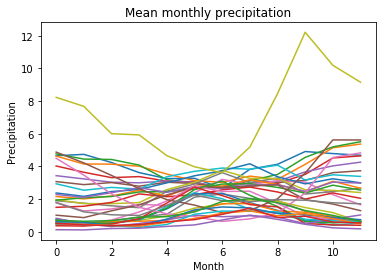

In [8]:
# Plot the MultivariateFunctionalData
fig, ax = plot(canadWeather,
               main=['Mean daily temperature', 'Mean monthly precipitation'], 
               xlab=['Day', 'Month'],
               ylab=['Temperature', 'Precipitation'])

In [9]:
# Accessing the attribut of the classes
monthlyPrec.argvals

[(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11)]

In [10]:
# Number of observations for an object
monthlyPrec.nObs()

35

In [11]:
# Mean function of the monthly precipitation
monthlyPrec.mean()

Univariate Functional data objects with 1 observations of 1-dimensional support
argvals:
	0, 1, ... , 11	(12 sampling points)
values:
	array of size (1, 12)

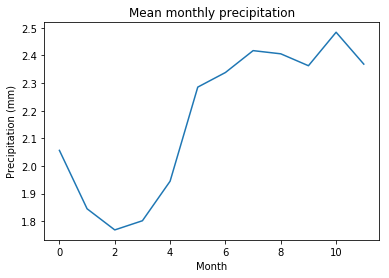

In [12]:
fig, ax = plot(monthlyPrec.mean(), main='Mean monthly precipitation', xlab='Month', ylab='Precipitation (mm)')

In [13]:
# Covariance function of the monthly precipitation
monthlyPrec.covariance()

Univariate Functional data objects with 1 observations of 2-dimensional support
argvals:
	0, 1, ... , 11	(12 sampling points)
	0, 1, ... , 11	(12 sampling points)
values:
	array of size (1, 12, 12)

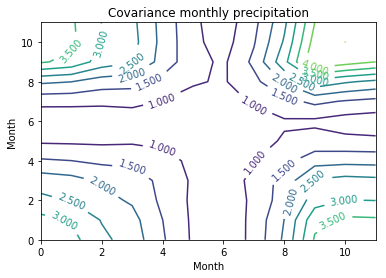

In [14]:
fig, ax = plot(monthlyPrec.covariance(), main='Covariance monthly precipitation', xlab='Month', ylab='Month')

In [15]:
# Number of sampling points for an object
canadWeather.nObsPoint()

[[365], [12]]

In [16]:
# Mean functions of the canadian weather
canadWeather.mean()

Multivariate Functional data objects with 2 funtions:
- Univariate Functional data objects with 1 observations of 1-dimensional support
argvals:
	0, 1, ... , 364	(365 sampling points)
values:
	array of size (1, 365)
- Univariate Functional data objects with 1 observations of 1-dimensional support
argvals:
	0, 1, ... , 11	(12 sampling points)
values:
	array of size (1, 12)

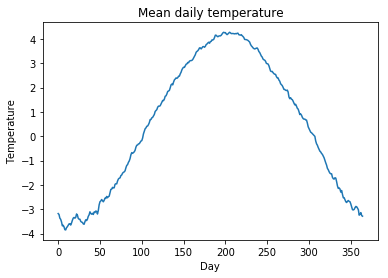

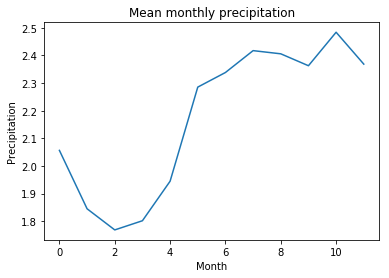

In [17]:
fig, ax = plot(canadWeather.mean(), 
               main=['Mean daily temperature', 'Mean monthly precipitation'], 
               xlab=['Day', 'Month'],
               ylab=['Temperature', 'Precipitation'])

In [18]:
# Covariance functions of the canadian weather
canadWeather.covariance()

Multivariate Functional data objects with 2 funtions:
- Univariate Functional data objects with 1 observations of 2-dimensional support
argvals:
	0, 1, ... , 364	(365 sampling points)
	0, 1, ... , 364	(365 sampling points)
values:
	array of size (1, 365, 365)
- Univariate Functional data objects with 1 observations of 2-dimensional support
argvals:
	0, 1, ... , 11	(12 sampling points)
	0, 1, ... , 11	(12 sampling points)
values:
	array of size (1, 12, 12)

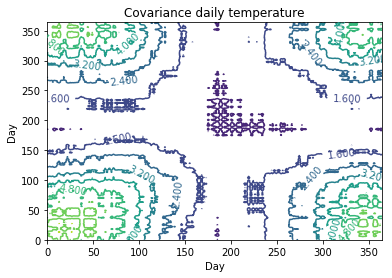

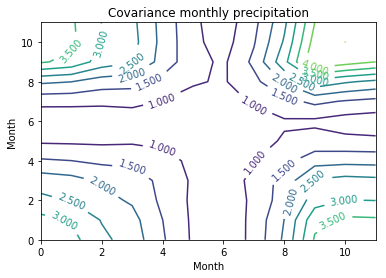

In [19]:
fig, ax = plot(canadWeather.covariance(), 
               main=['Covariance daily temperature', 'Covariance monthly precipitation'], 
               xlab=['Day', 'Month'],
               ylab=['Day', 'Month'])

In [20]:
# Dimension of the domain of observations
dailyTemp.dimension()

1

In [21]:
# Extract observations from UnivariateFunctionalData
dailyTemp[3:6]

Univariate Functional data objects with 3 observations of 1-dimensional support
argvals:
	0, 1, ... , 364	(365 sampling points)
values:
	array of size (3, 365)

In [22]:
# Extract functions from MultivariateFunctionalData
canadWeather[0]

Univariate Functional data objects with 35 observations of 1-dimensional support
argvals:
	0, 1, ... , 364	(365 sampling points)
values:
	array of size (35, 365)

In [23]:
# Convert UnivariateFunctionalData into IrregularFunctionalData.
dailyTemp.asIrregularFunctionalData()

Irregular Functional data objects with 35 observations of 1-dimensional support
argvals:
	Values in 0 ... 364.
values:
	Values in -8.7 ... 5.7.
There are 365 - 365 sampling points per observation.

In [24]:
# Convert UnivariateFunctionalData into MultivariateFunctionalData.
monthlyPrec.asMultivariateFunctionalData()

Multivariate Functional data objects with 1 funtions:
- Univariate Functional data objects with 35 observations of 1-dimensional support
argvals:
	0, 1, ... , 11	(12 sampling points)
values:
	array of size (35, 12)

In [25]:
# Add another function to a MultivariateFunctionalData
#canadWeather.add(dailyTemp)

In [26]:
# Perform a univariate FPCA on dailyTemp.
fpca = UFPCA(n_components=0.99, whiten=True)
fpca.fit(dailyTemp)

In [27]:
# Compute the scores of the dailyTemp data into the eigenfunctions basis.
dailyTemp_proj = fpca.transform(dailyTemp)

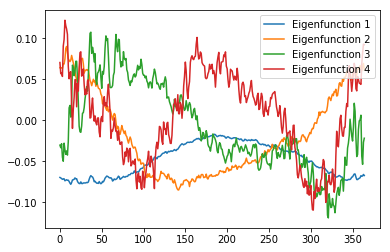

In [28]:
# Plot the results of the FPCA
for idx, eigenfunction in enumerate(fpca.eigenfunctions):
    plt.plot(eigenfunction, label=' '.join(['Eigenfunction', str(idx+1)]))
plt.legend()
plt.show()

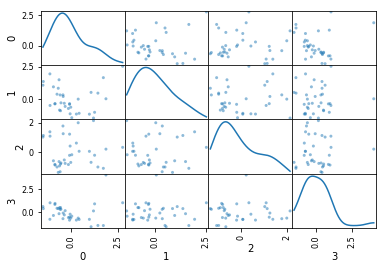

In [29]:
# Plot the projection of the data onto the eigenfunctions
pd.plotting.scatter_matrix(pd.DataFrame(dailyTemp_proj), diagonal='kde')
plt.show()

In [30]:
# Test if the reconstruction is good.
dailyTemp_reconst = fpca.inverse_transform(dailyTemp_proj)

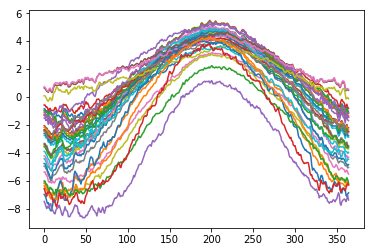

In [31]:
# Plot the reconstructed curves
fig, ax = plot(dailyTemp_reconst)
plt.show()

In [32]:
# Perform a univariate FPCA on monthlyPrec.
fpca = UFPCA(n_components=0.99, whiten=True)
fpca.fit(monthlyPrec)

In [33]:
# Compute the scores of the monthlyPrec data into the eigenfunctions basis.
monthlyPrec_proj = fpca.transform(monthlyPrec)

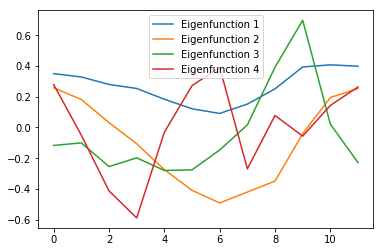

In [34]:
# Plot the results of the FPCA
for idx, eigenfunction in enumerate(fpca.eigenfunctions):
    plt.plot(eigenfunction, label=' '.join(['Eigenfunction', str(idx+1)]))
plt.legend()
plt.show()

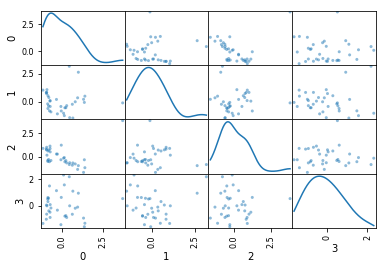

In [35]:
# Plot the projection of the data onto the eigenfunctions
pd.plotting.scatter_matrix(pd.DataFrame(monthlyPrec_proj), diagonal='kde')
plt.show()

In [36]:
# Test if the reconstruction is good.
monthlyPrec_reconst = fpca.inverse_transform(monthlyPrec_proj)

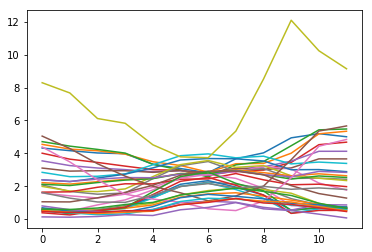

In [37]:
# Plot the reconstructed curves
fig, ax = plot(monthlyPrec_reconst)
plt.show()

In [38]:
# Perform multivariate FPCA
mfpca = MFPCA(n_components=0.99, whiten=False)
mfpca.fit(canadWeather)

In [39]:
# Compute the scores of the canadWeather data into the multivariate eigenfunctions basis.
canadWeather_proj = mfpca.transform(canadWeather)

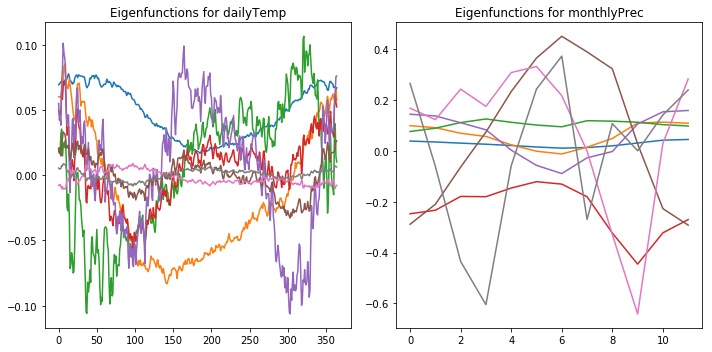

In [40]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(mfpca.basis_[0])
plt.title('Eigenfunctions for dailyTemp')

plt.subplot(1, 2, 2)
plt.plot(mfpca.basis_[1])
plt.title('Eigenfunctions for monthlyPrec')

plt.tight_layout()
plt.show()

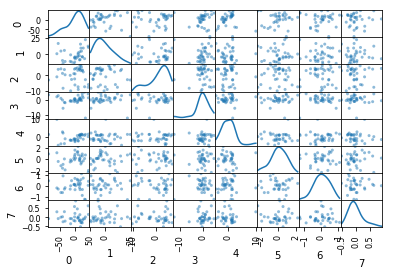

In [41]:
# Plot the projection of the data onto the eigenfunctions
pd.plotting.scatter_matrix(pd.DataFrame(canadWeather_proj), diagonal='kde')
plt.show()

In [42]:
# Test if the reconstruction is good.
canadWheather_reconst = mfpca.inverse_transform(canadWeather_proj)

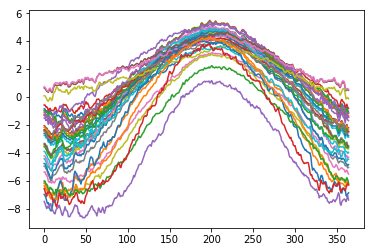

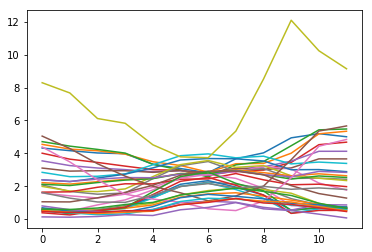

In [43]:
# Plot the reconstructed curves
fig, ax = plot(canadWheather_reconst)
plt.show()

In [44]:
# Smooth the data
points = tuple(i / 10 for i in range(min(dailyTemp.argvals[0]), 10*(max(dailyTemp.argvals[0]) + 1), 1))
dailyTempSmooth = dailyTemp.smooth(points, bandwith=5)

In [45]:
# Compute the tensor product of monthlyPrec and dailyTemp
tensProd = dailyTemp.tensorProduct(monthlyPrec)

In [46]:
# Integrate the observations of dailyTemp over the domain
inte = dailyTemp.integrate(method='simpson')

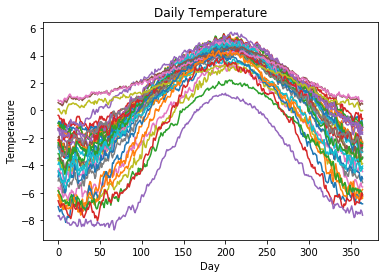

In [47]:
# Plot univariate data
fig, ax = plot(dailyTemp, main='Daily Temperature', xlab='Day', ylab='Temperature')
plt.show()

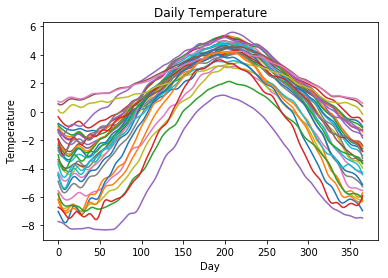

In [48]:
# Plot univariate smooth data
fig, ax = plot(dailyTempSmooth, main='Daily Temperature', xlab='Day', ylab='Temperature')
plt.show()

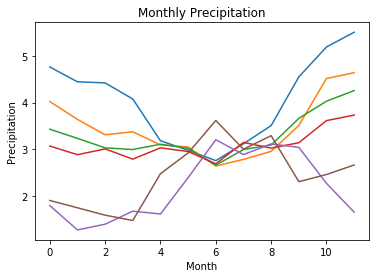

In [49]:
# Plot sample of univariate data
fig, ax = plot(monthlyPrec[2:8], main='Monthly Precipitation', xlab='Month', ylab='Precipitation')
plt.show()